In [1]:
from utils import *
%load_ext autoreload
%autoreload 2

In [2]:
x0 = pd.read_csv("nonlinear_vectorfield_data_x0.txt", sep = " ", header = None).to_numpy()
x1 = pd.read_csv("nonlinear_vectorfield_data_x1.txt", sep = " ", header = None).to_numpy()

# Part 1: Estimate the vector field with a linear operator

In [3]:
# Apply finite-difference formula
v = (x1-x0)/0.01

# Estimate the vector field A with least-squares minimization
A, _, _, _ = LSM(x0, v)

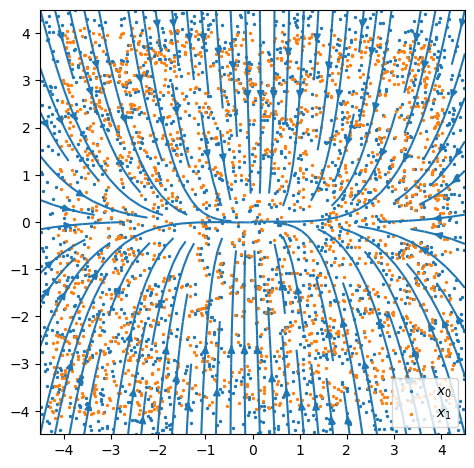

In [4]:
# Plot the vector field A within the domain of the dataset
w = 4.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
ax = phase_portrait(A, X, Y)

# Plot the dataset
ax.scatter(x0[:, 0], x0[:, 1], s = 2, label = r'$x_0$')
ax.scatter(x1[:, 0], x1[:, 1], s = 2, label = r'$x_1$')
plt.legend()
plt.show()

In [5]:
# Solve dx/dt = Ax with X as initial points up to a time 0.01
x1_pred = []
t = 0.01
for i in range(len(x0)):
    y = predict_x1(x0[i], t, A)
    x1_pred.append(np.ndarray.flatten(y))
x1_pred = np.array(x1_pred)
mse = (np.linalg.norm(x1 - x1_pred) ** 2) / len(x0)
print('MSE =', mse)

MSE = 0.03729187915931998


# Part 2: Approximate the vector field using radial basis functions

In [6]:
# Define the concatenation of L^2 radial basis functions φ(X)
L = 10
w = 4.5
Y, X = np.mgrid[-w:w:complex(0, L), -w:w:complex(0, L)]
domain = np.array([[X[i][j], Y[i][j]] for i in range(len(X)) for j in range(len(Y))])
eps = 0.75
phi = RBF(eps, domain)

x0_phi = np.array(phi(x0[0]))
for i in range(1, len(x0)):
    x0_phi = np.vstack((x0_phi, phi(x0[i])))

v = (x1-x0)/0.01

C, _, _, _ = LSM(x0_phi, v)
C = C.T

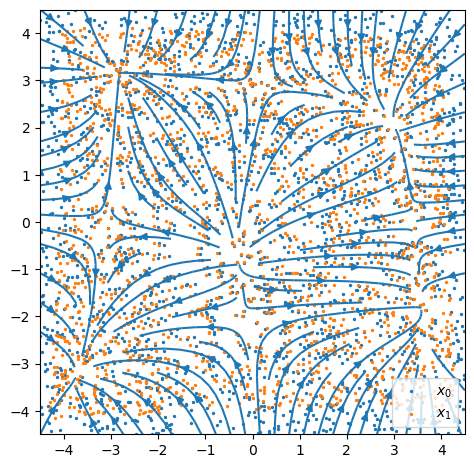

In [7]:
# Plot the nonlinear vector field within the domain of the dataset
w = 4.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
ax = phase_portrait_nonlinear(C, phi, X, Y)

# Plot the dataset
ax.scatter(x0[:, 0], x0[:, 1], s = 2, label = r'$x_0$')
ax.scatter(x1[:, 0], x1[:, 1], s = 2, label = r'$x_1$')
ax.set_aspect(1)
plt.legend()
plt.show()

In [8]:
# Solve dx/dt = Cphi(x) with X as initial points up to a time 0.01
x1_pred = []
t = 0.01
for i in range(len(x0)):
    y = predict_x1_nonlinear(x0[i], t, C, phi)
    x1_pred.append(np.ndarray.flatten(y))
x1_pred = np.array(x1_pred)
mse = (np.linalg.norm(x1 - x1_pred) ** 2) / len(x0)
print('MSE =', mse)

MSE = 0.0006731265889727473


# Part 3: Finding the steady states

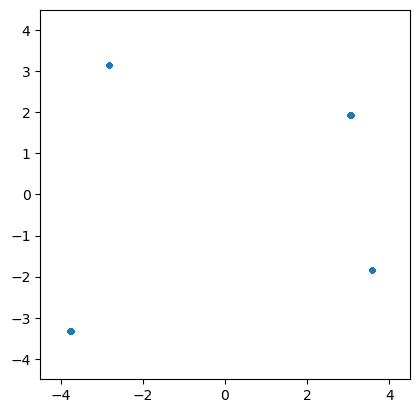

In [9]:
# Predict x1 with a larger time to find the steady states
w=4.5
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-w, w)
ax.set_ylim(-w, w)

t = 5
x1_pred = []
for i in range(len(x0)):
    y = predict_x1_nonlinear(x0[i], t, C, phi)
    x1_pred.append(np.ndarray.flatten(y))
x1_pred = np.array(x1_pred)
ax.scatter(x1_pred[:, 0], x1_pred[:, 1], s = 10)
ax.set_aspect(1)
plt.show()